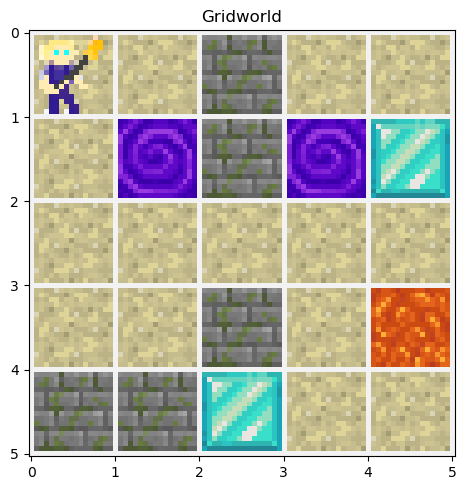

####### episodes : 50


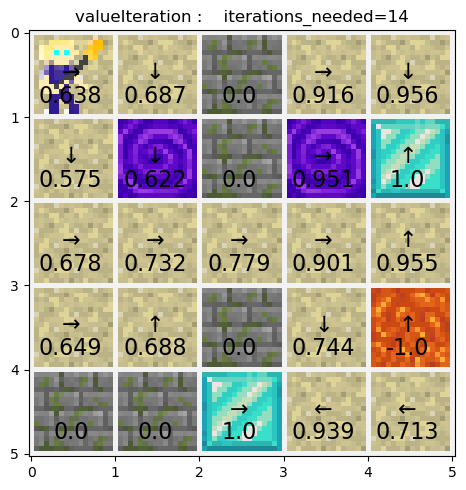

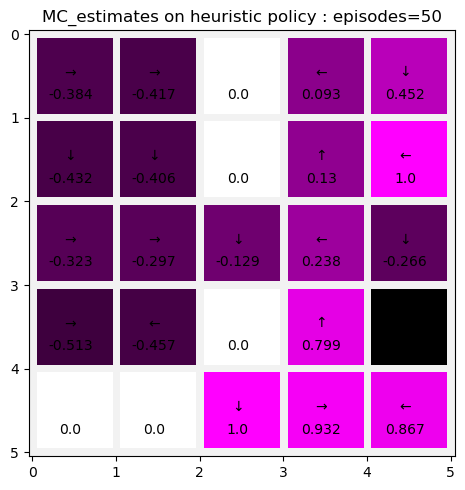

####### episodes : 200


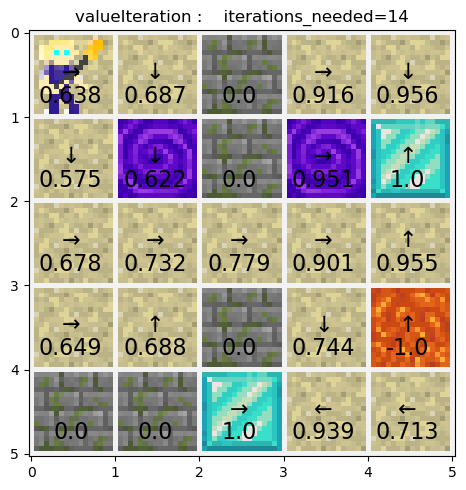

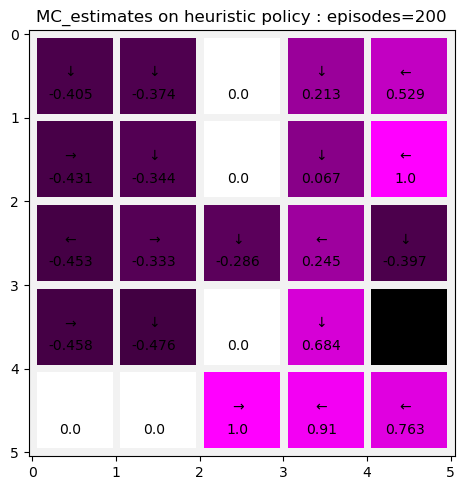

####### episodes : 500
####### episodes : 1000
####### episodes : 10000


In [2]:
from reinforcmentLearning import GridWorld, Agent
from my_utils import init_rendering_resources
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# from imageio.v2 import imread
import random
import logging
import warnings

## TODO better documentation / comments while writing the code

warnings.filterwarnings('ignore')
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(lineno)d - %(levelname)s : %(message)s',
                     datefmt='%H:%M:%S')
logger = logging.getLogger('my-logger')
# logger.propagate = False
logger.disabled = True

# ploting settings
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True

# class State/cell ?
# class render ? 
# use enums for actions, terminal and obsticals types , environment dynamics ..etc ?

if __name__ == "__main__":
    
    # variables for training , scale for ploting and an episodes list
    scale = 10
    episodes = [50,200,500,1000,10000]
    textures_map = init_rendering_resources(configuration=0)
    # print(textures_map)

    # simple grid
    world = GridWorld(5,5 ,
            terminalState={'goal': [(1,4)],
                        'negative_goal': [(3,4)]},
            terrain={'wall': [(0,2),(1,2),(3,2)]},
            setRewards= {'default': -0.02},
            environmentDynamics='stochastic')
    # world.showGrid(style='image' , images=img_map)

    # creating an agent in the gridworld
    agent = Agent(environment=world)

    # adding more complexity to the grid (terrains and goals)
    world.addTerminal(('goal',[(4,2)]))
    world.addTerrain(('wall',[(4,0),(4,1)]),('shortcut', [(1,1),(1,3)]))
    # world.deleteObject((4,0),(4,2))
    world.showGrid(style='image' , images=textures_map)
    
    # trainig in the more complex grid
    for x in episodes:
        print(f'####### episodes : {x}' )
        if x in episodes[:2]:
            _ , iterations = agent.valueIteration(world, max_iterations=x, gamma=0.9) 
            agent.showResults(world, style='image',results='both' ,size=scale, images=textures_map,
                            title=f'valueIteration :    iterations_needed={iterations}')
        if x in episodes[:2]:
            agent.policy = agent.policyGenerator(world)
            agent.updateStateValueFunc(world, evaluationMethod='MC', policy=agent.policy, samples=x , max_steps = 25)
            # agent.policy = agent.prob_to_determin_policy(world, agent.policy)
            agent.showResults(world, style='color map',results='both', policy_probabilistc=True, size=scale, images=textures_map,
                            title=f'MC_estimates on heuristic policy : episodes={x}')
    plt.ioff()
    plt.show()
    
## TODO seperate rendering into own class, (in general more classes / independent functoins)

